# **Data Collection and Preprocessing**

### **1) Importing libraries**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Import libraries for model development
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Import libraries for Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries needed for evaluation purpose
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

# Import libraries for data preprocessing and feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Import library for forming table to visualize results
from tabulate import tabulate

# Import library for normalization
from scipy import stats


### **2) Load the Dataset**

In [ ]:
# load data from CSV file into a pandas DataFrame
url = "https://raw.githubusercontent.com/CarmenLam0922/ML-assignment/b4e0cc9998565a39e27d4cb48872a8e2f09cc496/heart_2020_cleaned.csv"
df =  pd.DataFrame(pd.read_csv(url))

In [ ]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


### **3) Explore the Dataset**

In [ ]:
# Check shape of dataset with rows and columns
df.shape

(319795, 18)

In [ ]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
# Check the head (first 5 rows) of the dataset
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
# Check the tail (last 5 rows) of the dataset
df.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


In [ ]:
# Get statistics of dataset and round off to 2 decimal places
df.describe().round(2)

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.00,319795.00,319795.00,319795.00
mean,28.33,3.37,3.90,7.10
std,6.36,7.95,7.96,1.44
min,12.02,0.00,0.00,1.00
25%,24.03,0.00,0.00,6.00
50%,27.34,0.00,0.00,7.00
75%,31.42,2.00,3.00,8.00
max,94.85,30.00,30.00,24.00


### **4) Data Cleaning**

**Checking for Missing Values**

In [ ]:
# Check count of dataset
# Check count of non-null value for each feature
# Check type of variable for each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
# Check count of null value
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


Since there are no null values in the dataset, it can be considered clean.

### **5) Categorical Data Encoding**

In [ ]:
# Check the number of unique values for each column in the DataFrame
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

There are attributes that contain more than two unique values. For the categorical variables with only two unique values, we will use binary encoding. For the categorical variables with more than two unique values, we will use one hot encoding and ordinal encoding.

In [ ]:
# Replace 'Yes' and 'No' string with binary values ('1' and '0', respectively)
# Replace 'Male' and 'Female' string with binary values ('1' and '0', respectively)
# Replace 'No, borderline diabetes' string with '0'
# Replace 'Yes (during pregnancy)' string with '1'
df =  df[df.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes': 0,'Yes (during pregnancy)': 1 })
df['Diabetic'] = df['Diabetic'].astype(int)
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,0,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,60-64,Hispanic,1,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,35-39,Hispanic,0,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,45-49,Hispanic,0,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,25-29,Hispanic,0,0,Good,12.0,0,0,0


In [ ]:
# Count the occurrences of each unique value in the 'AgeCategory' column to check its distribution as a categorical variable.
df.AgeCategory.value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [ ]:
# Count the occurrences of each unique value in the 'GenHealth' column to check its distribution as a categorical variable.
df.GenHealth.value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

In [ ]:
# Count the occurrences of each unique value in the 'Race' column to check its distribution as a categorical variable.
df.Race.value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [ ]:
# Perform ordinal encoding for the 'AgeCategory' and 'GenHealth' attributes
# Categorical values for 'AgeCategory' and 'GenHealth' are replaced with numerical values based on their assigned order or rank
ageCategory= {'18-24':0, '25-29':1, '30-34':2, '35-39':3, '40-44':4, '45-49':5, '50-54':6, '55-59':7, '60-64':8,
             '65-69':9, '70-74':10, '75-79':11, '80 or older':12}
df['AgeCategory'] = df['AgeCategory'].map(ageCategory)
genHealth = {'Poor':0, 'Fair':1, 'Good':2, 'Very good':3, 'Excellent':4}
df['GenHealth'] = df['GenHealth'].map(genHealth)

In [ ]:
# Perform one-hot encoding for the 'Race' attributes
one_hot_encoded = pd.get_dummies(df['Race'], prefix='Race')

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df.drop(columns=['Race']), one_hot_encoded], axis=1)

# Replace True/False with 1/0 in the DataFrame
columns_to_encode = ['Race_American Indian/Alaskan Native', 'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White']
df[columns_to_encode] = df[columns_to_encode].astype(int)

# Print the encoded DataFrame
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,16.60,1,0,0,3.0,30.0,0,0,7,...,5.0,1,0,1,0,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,...,7.0,0,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,9,...,8.0,1,0,0,0,0,0,0,0,1
3,0,24.21,0,0,0,0.0,0.0,0,0,11,...,6.0,0,0,1,0,0,0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,...,8.0,0,0,0,0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 23 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   HeartDisease                         319795 non-null  int64  
 1   BMI                                  319795 non-null  float64
 2   Smoking                              319795 non-null  int64  
 3   AlcoholDrinking                      319795 non-null  int64  
 4   Stroke                               319795 non-null  int64  
 5   PhysicalHealth                       319795 non-null  float64
 6   MentalHealth                         319795 non-null  float64
 7   DiffWalking                          319795 non-null  int64  
 8   Sex                                  319795 non-null  int64  
 9   AgeCategory                          319795 non-null  int64  
 10  Diabetic                             319795 non-null  int64  
 11  PhysicalActiv

In [ ]:
# Export dataframe to CSV file
df.to_csv('final dataset.csv', index=False)

### **6) Exploratory Data Analysis (EDA)**

EDA is used to explore both the target variable (y) and the independent variables (x). The goal of EDA is to gain a better understanding of the dataset, identify patterns, relationships, distributions, and potential outliers or missing values. It helps in understanding the data from different angles and can provide insights into the relationships between variables.


In [ ]:
# Calculate and display summary statistics
summary_stats = df.describe(include='all')
print(summary_stats)

        HeartDisease            BMI        Smoking  AlcoholDrinking  \
count  319795.000000  319795.000000  319795.000000    319795.000000   
mean        0.085595      28.325399       0.412477         0.068097   
std         0.279766       6.356100       0.492281         0.251912   
min         0.000000      12.020000       0.000000         0.000000   
25%         0.000000      24.030000       0.000000         0.000000   
50%         0.000000      27.340000       0.000000         0.000000   
75%         0.000000      31.420000       1.000000         0.000000   
max         1.000000      94.850000       1.000000         1.000000   

              Stroke  PhysicalHealth   MentalHealth    DiffWalking  \
count  319795.000000    319795.00000  319795.000000  319795.000000   
mean        0.037740         3.37171       3.898366       0.138870   
std         0.190567         7.95085       7.955235       0.345812   
min         0.000000         0.00000       0.000000       0.000000   
25%       

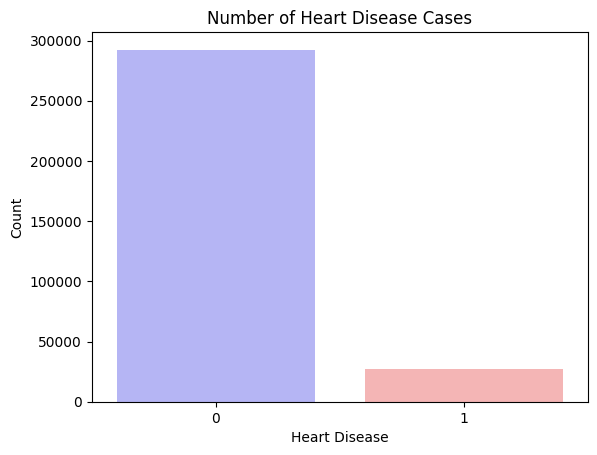

In [ ]:
# Create a countplot for target variable "HeartDisease"
sns.countplot(x="HeartDisease", data=df, palette="bwr")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.title("Number of Heart Disease Cases")
plt.show()

0 represents no heart disease.

1 represents heart disease.

In [ ]:
countNoDisease = len(df[df.HeartDisease == 0])
countHaveDisease = len(df[df.HeartDisease == 1])
print("Percentage of patients who do not have heart disease: {:.2f}%".format((countNoDisease / (len(df.HeartDisease))*100)))
print("Percentage of patients who have heart disease: {:.2f}%".format((countHaveDisease / (len(df.HeartDisease))*100)))

Percentage of patients who do not have heart disease: 91.44%
Percentage of patients who have heart disease: 8.56%


**Categorical Variables**





Smoking, Alcohol drinking, Stroke, Difficult Walking, Sex, Age Category, Race, Diabetic, Physical Activity, General Health, Asthma, Kidney Disease, Skin Cancer

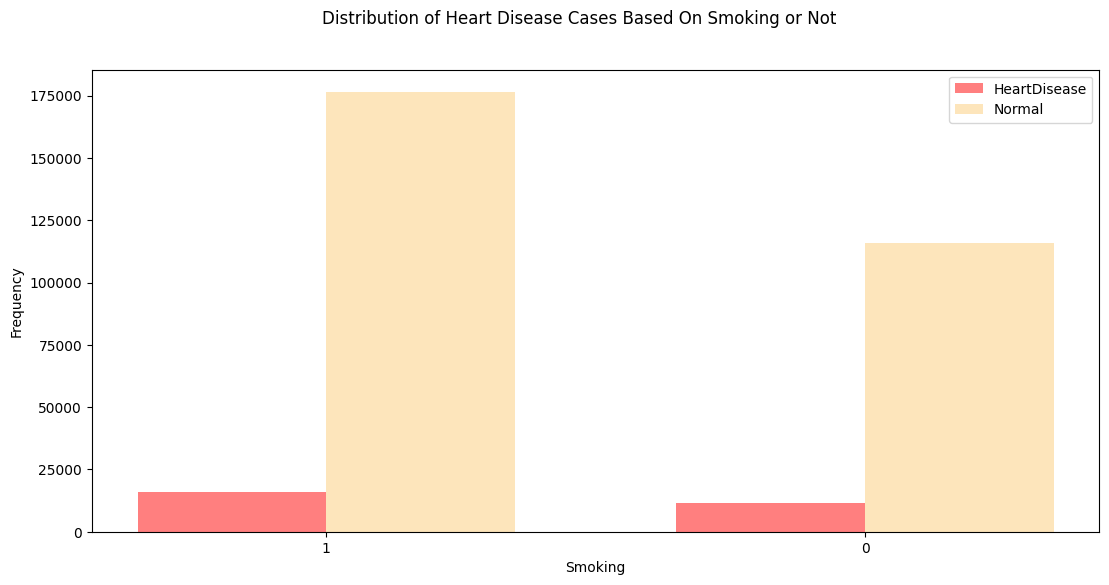

In [ ]:
#Create a grouped bar plot to understand relationship between heart disease and smoking
heart_disease_counts = df[df["HeartDisease"] == 1]["Smoking"].value_counts()
normal_counts = df[df["HeartDisease"] == 0]["Smoking"].value_counts()

categories = heart_disease_counts.index.unique()
x = np.arange(len(categories))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x - bar_width/2, heart_disease_counts, width=bar_width, color="red", alpha=0.5, label="HeartDisease")
ax.bar(x + bar_width/2, normal_counts, width=bar_width, color="#fccc79", alpha=0.5, label="Normal")

ax.set_xlabel("Smoking")
ax.set_ylabel("Frequency")

ax.set_xticks(x)
ax.set_xticklabels(categories)

fig.suptitle("Distribution of Heart Disease Cases Based On Smoking or Not")

ax.legend()
plt.show()



0 represents no smoking.

1 represents smoking.

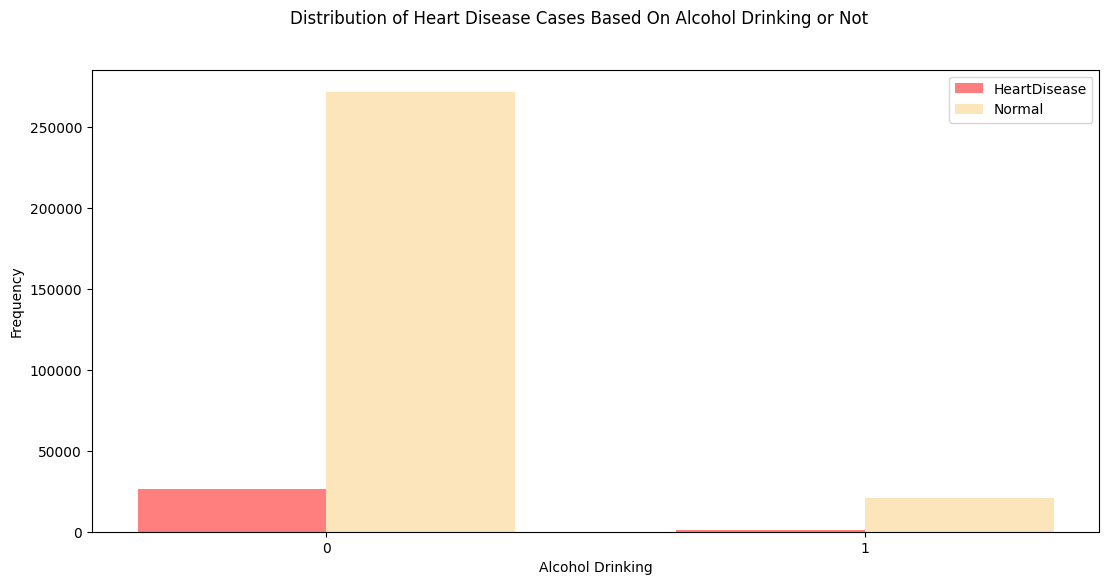

In [ ]:

#Create a grouped bar plot to understand relationship between heart disease and alcohol drinking
heart_disease_counts = df[df["HeartDisease"] == 1]["AlcoholDrinking"].value_counts()
normal_counts = df[df["HeartDisease"] == 0]["AlcoholDrinking"].value_counts()

categories = heart_disease_counts.index.unique()
x = np.arange(len(categories))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x - bar_width/2, heart_disease_counts, width=bar_width, color="red", alpha=0.5, label="HeartDisease")
ax.bar(x + bar_width/2, normal_counts, width=bar_width, color="#fccc79", alpha=0.5, label="Normal")

ax.set_xlabel("Alcohol Drinking")
ax.set_ylabel("Frequency")

ax.set_xticks(x)
ax.set_xticklabels(categories)

fig.suptitle("Distribution of Heart Disease Cases Based On Alcohol Drinking or Not")

ax.legend()
plt.show()

0 represents no alcohol drinking.

1 represents alcohol drinking.

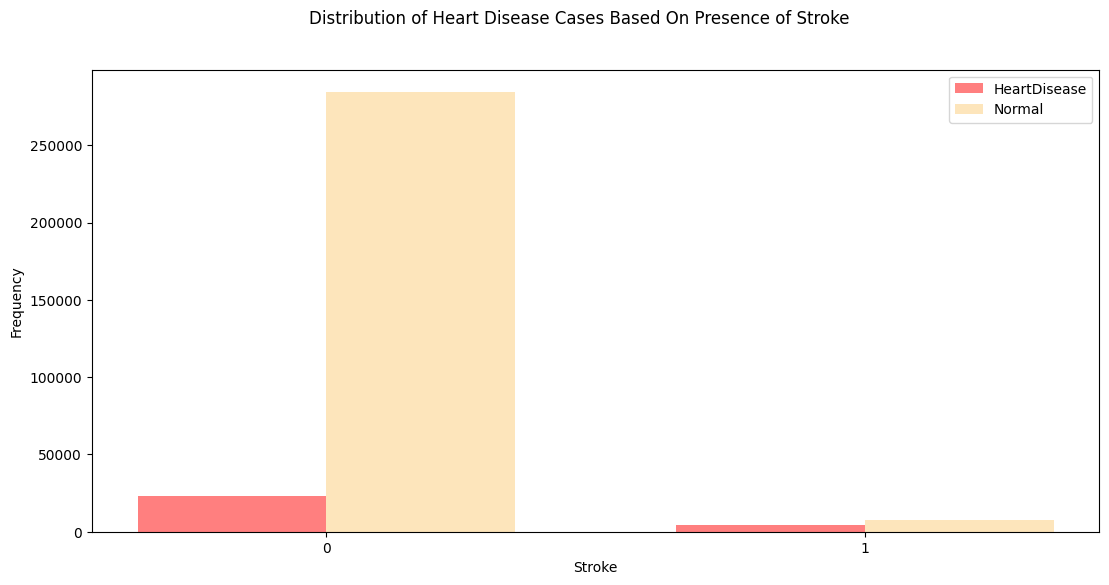

In [ ]:
#Create a grouped bar plot to understand relationship between heart disease and stroke
heart_disease_counts = df[df["HeartDisease"] == 1]["Stroke"].value_counts()
normal_counts = df[df["HeartDisease"] == 0]["Stroke"].value_counts()

categories = heart_disease_counts.index.unique()
x = np.arange(len(categories))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x - bar_width/2, heart_disease_counts, width=bar_width, color="red", alpha=0.5, label="HeartDisease")
ax.bar(x + bar_width/2, normal_counts, width=bar_width, color="#fccc79", alpha=0.5, label="Normal")

ax.set_xlabel("Stroke")
ax.set_ylabel("Frequency")

ax.set_xticks(x)
ax.set_xticklabels(categories)

fig.suptitle("Distribution of Heart Disease Cases Based On Presence of Stroke")

ax.legend()
plt.show()


0 represents no stroke.

1 represents stroke.

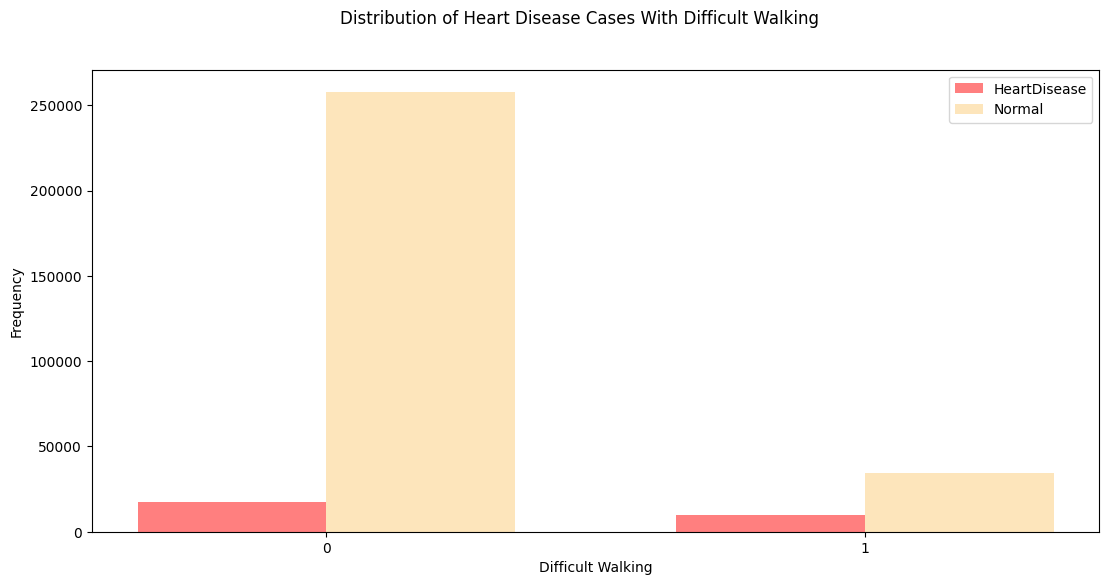

In [ ]:
#Create a grouped bar plot to understand relationship between heart disease and difficult walking
heart_disease_counts = df[df["HeartDisease"] == 1]["DiffWalking"].value_counts()
normal_counts = df[df["HeartDisease"] == 0]["DiffWalking"].value_counts()

categories = heart_disease_counts.index.unique()
x = np.arange(len(categories))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x - bar_width/2, heart_disease_counts, width=bar_width, color="red", alpha=0.5, label="HeartDisease")
ax.bar(x + bar_width/2, normal_counts, width=bar_width, color="#fccc79", alpha=0.5, label="Normal")

ax.set_xlabel("Difficult Walking")
ax.set_ylabel("Frequency")

ax.set_xticks(x)
ax.set_xticklabels(categories)

fig.suptitle("Distribution of Heart Disease Cases With Difficult Walking")

ax.legend()
plt.show()

0 represents no difficult walking.

1 represents difficult walking.

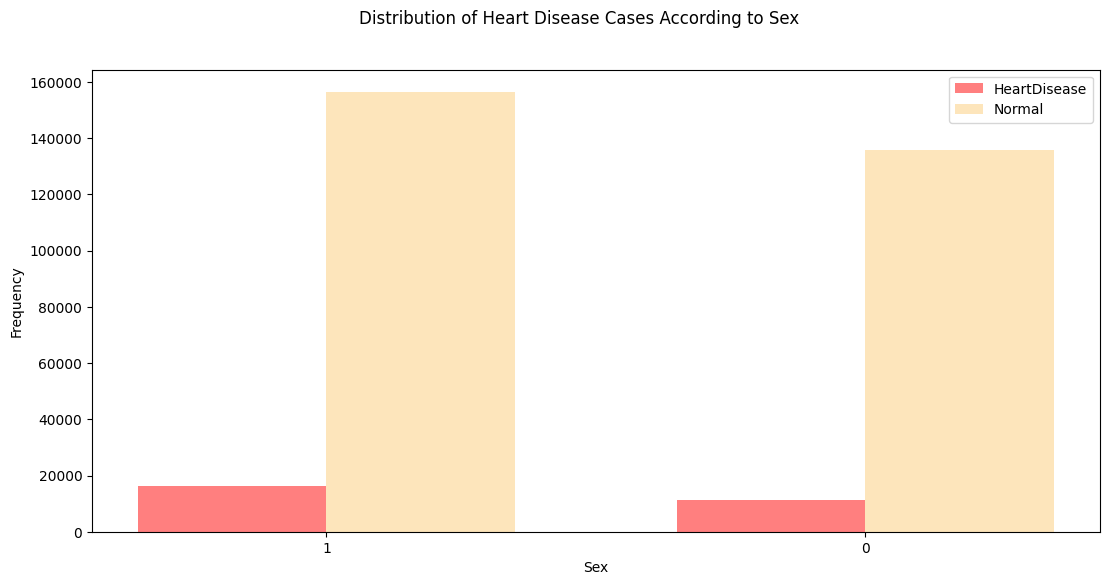

In [ ]:
#Create a grouped bar plot to understand relationship between heart disease and sex

heart_disease_counts = df[df["HeartDisease"] == 1]["Sex"].value_counts()
normal_counts = df[df["HeartDisease"] == 0]["Sex"].value_counts()

categories = heart_disease_counts.index.unique()
x = np.arange(len(categories))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x - bar_width/2, heart_disease_counts, width=bar_width, color="red", alpha=0.5, label="HeartDisease")
ax.bar(x + bar_width/2, normal_counts, width=bar_width, color="#fccc79", alpha=0.5, label="Normal")

ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")

ax.set_xticks(x)
ax.set_xticklabels(categories)

fig.suptitle("Distribution of Heart Disease Cases According to Sex")

ax.legend()
plt.show()



1 represents male.

0 represents female.

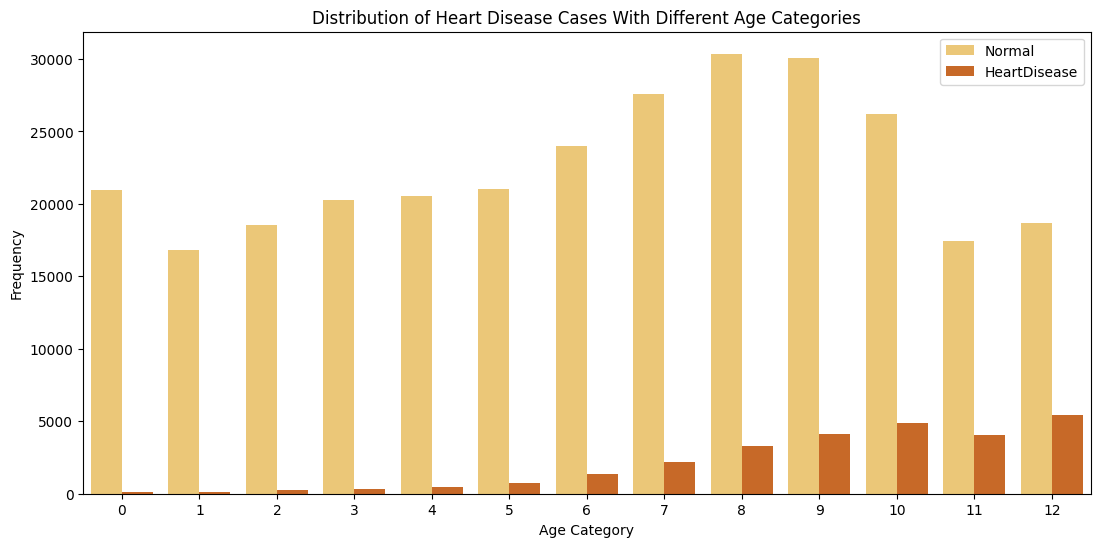

In [ ]:
#Create a countplot to understand relationship between heart disease and age category
plt.figure(figsize = (13,6))
sns.countplot(x = df['AgeCategory'], hue = 'HeartDisease', data = df, palette ='YlOrBr')
plt.xlabel('Age Category')
plt.legend(['Normal','HeartDisease'])
plt.ylabel('Frequency')
plt.title("Distribution of Heart Disease Cases With Different Age Categories")
plt.show()

0 represents 18-24

1 represents 25-29

2 represents 30-34

3 represents 35-39

4 represents 40-44

5 represents 45-49  

6 represents 50-54

7 represents 55-59  

8 represents 60-64

9 represents 65-69

10 represents 70-74

11 represents 75-79

12 represents 80 or older

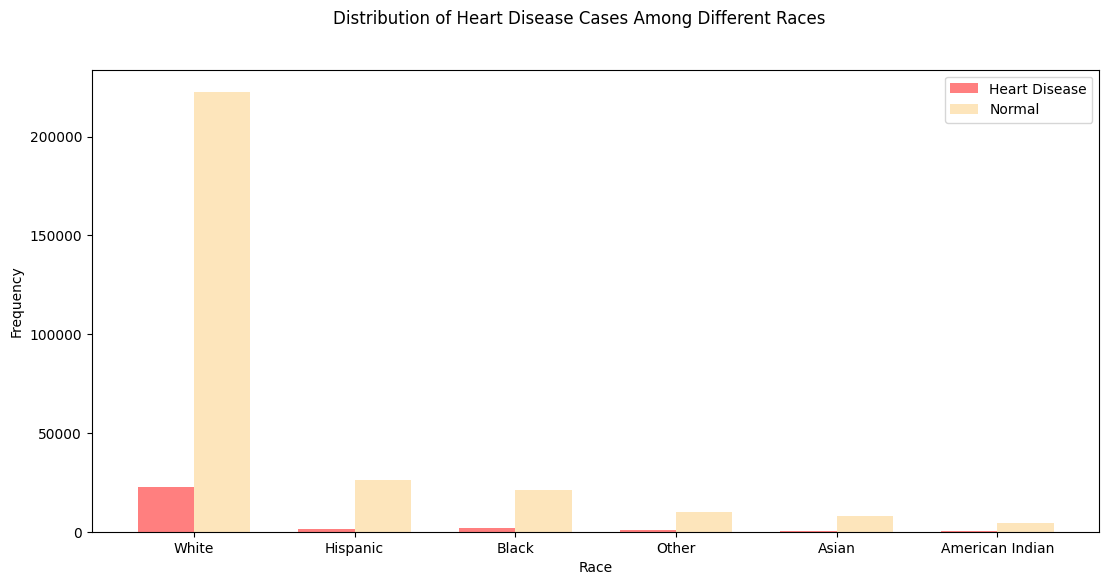

In [ ]:
# Create a grouped bar plot to understand the relationship between heart disease and race
heart_disease_counts = df[df["HeartDisease"] == 1][['Race_White', 'Race_Hispanic', 'Race_Black', 'Race_Other', 'Race_Asian', 'Race_American Indian/Alaskan Native']].sum()
normal_counts = df[df["HeartDisease"] == 0][['Race_White', 'Race_Hispanic', 'Race_Black', 'Race_Other', 'Race_Asian', 'Race_American Indian/Alaskan Native']].sum()

categories = ['White', 'Hispanic', 'Black', 'Other', 'Asian', 'American Indian']
x = np.arange(len(categories))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x - bar_width/2, heart_disease_counts, width=bar_width, color="red", alpha=0.5, label="Heart Disease")
ax.bar(x + bar_width/2, normal_counts, width=bar_width, color="#fccc79", alpha=0.5, label="Normal")

ax.set_xlabel("Race")
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylabel("Frequency")
fig.suptitle("Distribution of Heart Disease Cases Among Different Races")

ax.legend()
plt.show()


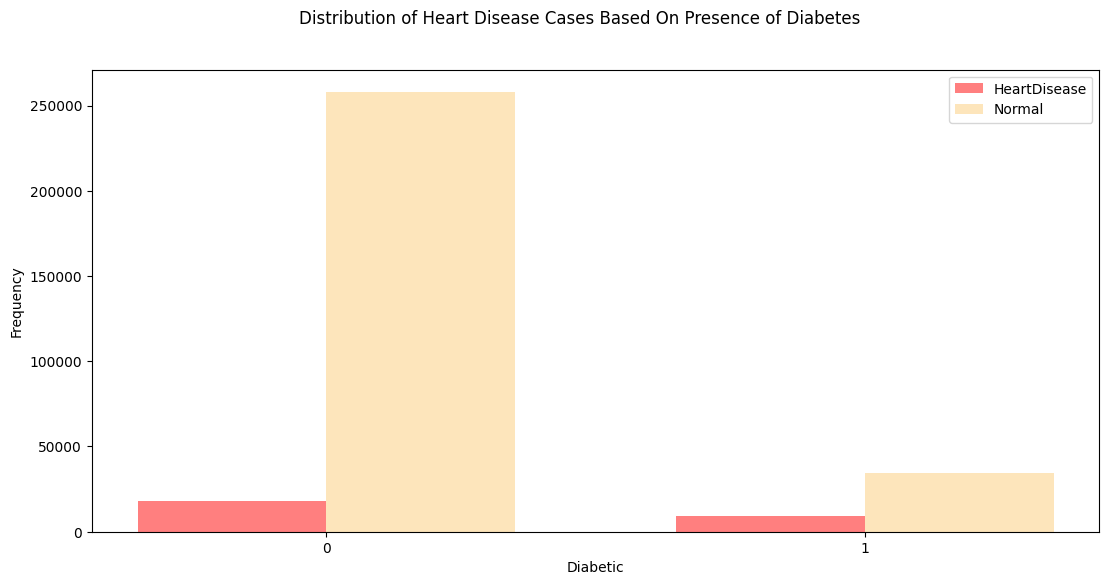

In [ ]:
#Create a grouped bar plot to understand relationship between heart disease and diabetic

heart_disease_counts = df[df["HeartDisease"] == 1]["Diabetic"].value_counts()
normal_counts = df[df["HeartDisease"] == 0]["Diabetic"].value_counts()

categories = heart_disease_counts.index.unique()
x = np.arange(len(categories))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x - bar_width/2, heart_disease_counts, width=bar_width, color="red", alpha=0.5, label="HeartDisease")
ax.bar(x + bar_width/2, normal_counts, width=bar_width, color="#fccc79", alpha=0.5, label="Normal")

ax.set_xlabel("Diabetic")
ax.set_ylabel("Frequency")

ax.set_xticks(x)
ax.set_xticklabels(categories)

fig.suptitle("Distribution of Heart Disease Cases Based On Presence of Diabetes")

ax.legend()
plt.show()


0 represents no diabetic.

1 represents diabetic.

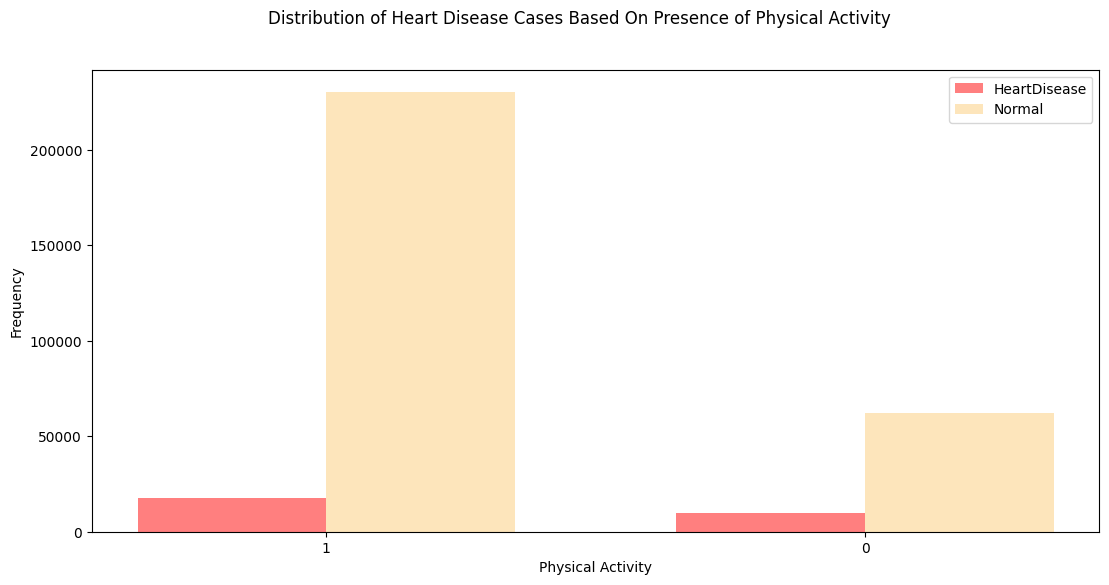

In [ ]:
#Create a grouped bar plot to understand relationship between heart disease and physical activity

heart_disease_counts = df[df["HeartDisease"] == 1]["PhysicalActivity"].value_counts()
normal_counts = df[df["HeartDisease"] == 0]["PhysicalActivity"].value_counts()

categories = heart_disease_counts.index.unique()
x = np.arange(len(categories))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x - bar_width/2, heart_disease_counts, width=bar_width, color="red", alpha=0.5, label="HeartDisease")
ax.bar(x + bar_width/2, normal_counts, width=bar_width, color="#fccc79", alpha=0.5, label="Normal")

ax.set_xlabel("Physical Activity")
ax.set_ylabel("Frequency")

ax.set_xticks(x)
ax.set_xticklabels(categories)

fig.suptitle("Distribution of Heart Disease Cases Based On Presence of Physical Activity")

ax.legend()
plt.show()


0 represents no physical activity.

1 represents physical activity.

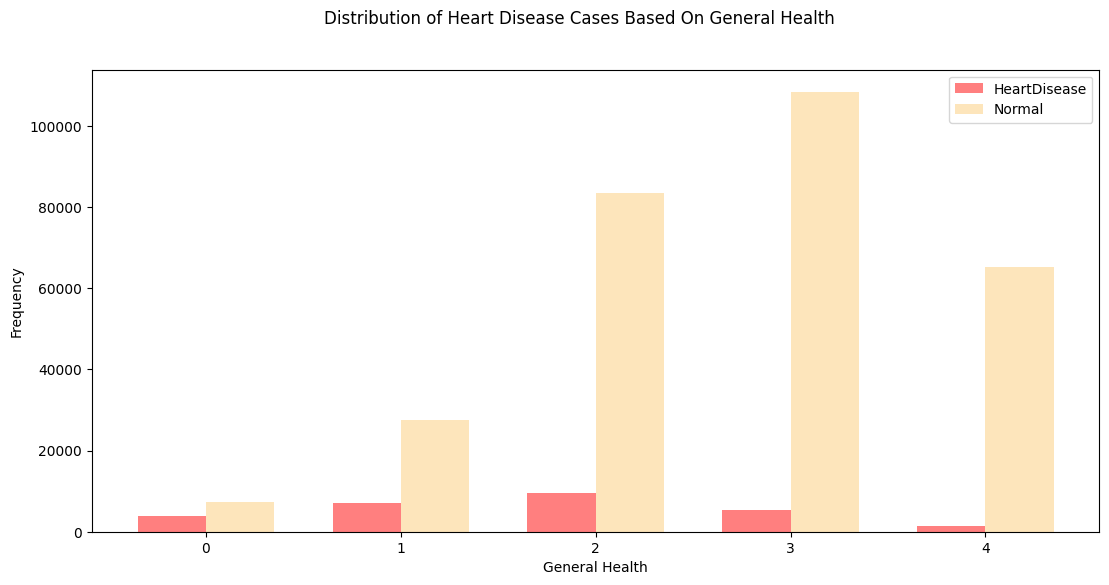

In [ ]:
#Create a grouped bar plot to understand relationship between heart disease and general health
heart_disease_counts = df[df["HeartDisease"] == 1]["GenHealth"].value_counts()
normal_counts = df[df["HeartDisease"] == 0]["GenHealth"].value_counts()

categories = heart_disease_counts.index.unique()
categories_numeric = categories.astype(int)
categories_sorted = sorted(categories_numeric)
x = np.arange(len(categories_sorted))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x - bar_width/2, heart_disease_counts.loc[categories_sorted], width=bar_width, color="red", alpha=0.5, label="HeartDisease")
ax.bar(x + bar_width/2, normal_counts.loc[categories_sorted], width=bar_width, color="#fccc79", alpha=0.5, label="Normal")

ax.set_xlabel("General Health")
ax.set_ylabel("Frequency")

ax.set_xticks(x)
ax.set_xticklabels(categories_sorted)

fig.suptitle("Distribution of Heart Disease Cases Based On General Health")

ax.legend()
plt.show()


0 represents poor.

1 represents fair.

2 represents good.

3 represents very good.

4 represents excellent.

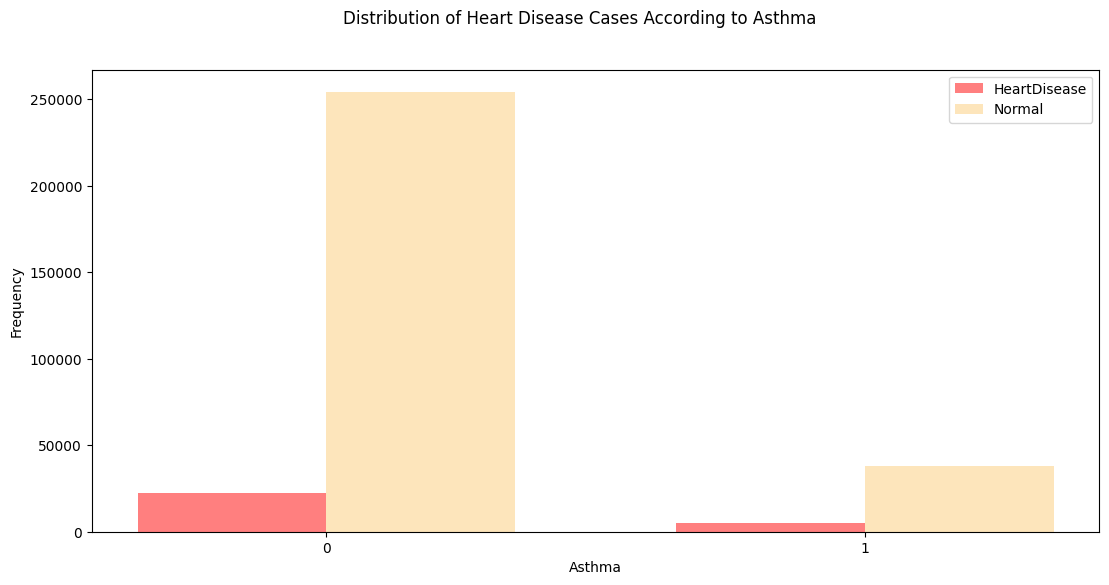

In [ ]:
#Create a grouped bar plot to understand relationship between heart disease and asthma
heart_disease_counts = df[df["HeartDisease"] == 1]["Asthma"].value_counts()
normal_counts = df[df["HeartDisease"] == 0]["Asthma"].value_counts()

categories = heart_disease_counts.index.unique()
x = np.arange(len(categories))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x - bar_width/2, heart_disease_counts, width=bar_width, color="red", alpha=0.5, label="HeartDisease")
ax.bar(x + bar_width/2, normal_counts, width=bar_width, color="#fccc79", alpha=0.5, label="Normal")

ax.set_xlabel("Asthma")
ax.set_ylabel("Frequency")

ax.set_xticks(x)
ax.set_xticklabels(categories)

fig.suptitle("Distribution of Heart Disease Cases According to Asthma")

ax.legend()
plt.show()


0 represents no asthma.

1 represents asthma.

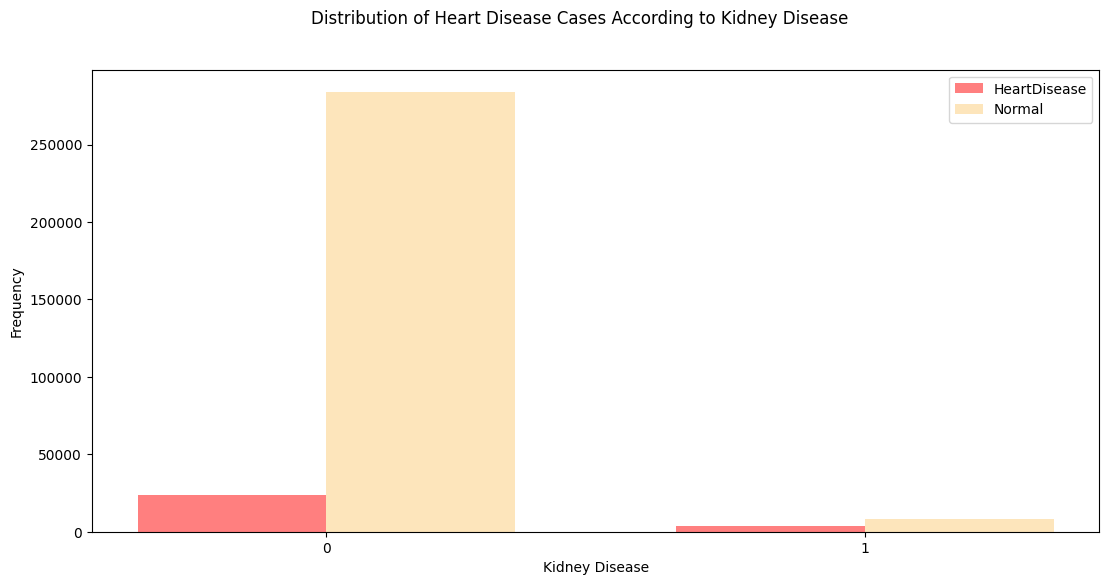

In [ ]:
#Create a grouped bar plot to understand relationship between heart disease and kidney disease
heart_disease_counts = df[df["HeartDisease"] == 1]["KidneyDisease"].value_counts()
normal_counts = df[df["HeartDisease"] == 0]["KidneyDisease"].value_counts()

categories = heart_disease_counts.index.unique()
x = np.arange(len(categories))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x - bar_width/2, heart_disease_counts, width=bar_width, color="red", alpha=0.5, label="HeartDisease")
ax.bar(x + bar_width/2, normal_counts, width=bar_width, color="#fccc79", alpha=0.5, label="Normal")

ax.set_xlabel("Kidney Disease")
ax.set_ylabel("Frequency")

ax.set_xticks(x)
ax.set_xticklabels(categories)

fig.suptitle("Distribution of Heart Disease Cases According to Kidney Disease")

ax.legend()
plt.show()


0 represents no kidney disease.

1 represents kidney disease.

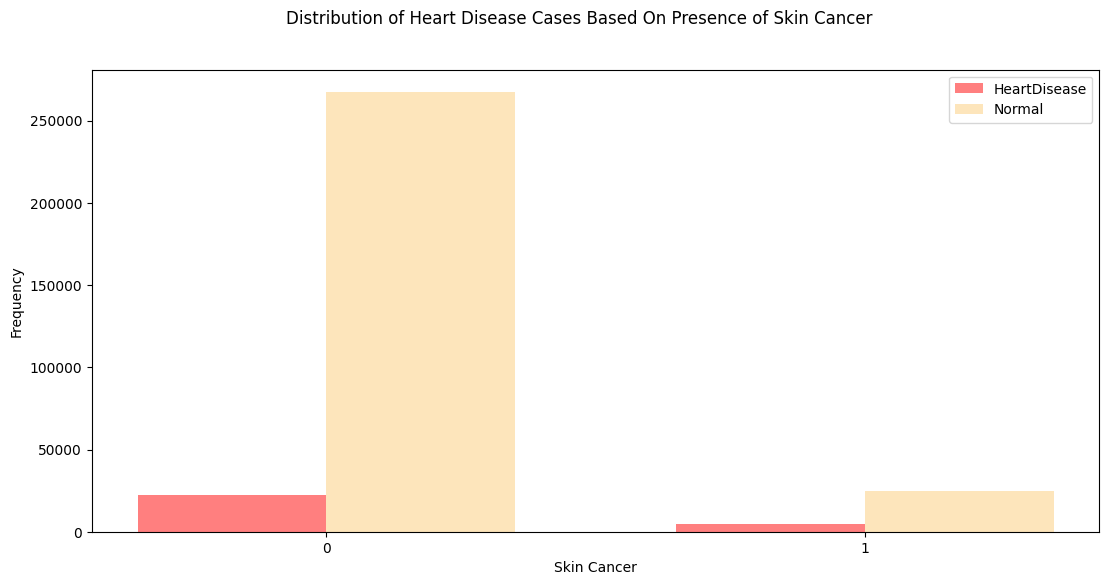

In [ ]:
#Create a grouped bar plot to understand relationship between heart disease and skin cancer

heart_disease_counts = df[df["HeartDisease"] == 1]["SkinCancer"].value_counts()
normal_counts = df[df["HeartDisease"] == 0]["SkinCancer"].value_counts()

categories = heart_disease_counts.index.unique()
x = np.arange(len(categories))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x - bar_width/2, heart_disease_counts, width=bar_width, color="red", alpha=0.5, label="HeartDisease")
ax.bar(x + bar_width/2, normal_counts, width=bar_width, color="#fccc79", alpha=0.5, label="Normal")

ax.set_xlabel("Skin Cancer")
ax.set_ylabel("Frequency")

ax.set_xticks(x)
ax.set_xticklabels(categories)

fig.suptitle("Distribution of Heart Disease Cases Based On Presence of Skin Cancer")

ax.legend()
plt.show()


0 represents no skin cancer.

1 represents skin cancer.

### **Numerical Variables**

BMI, Physical Health, Mental Health, Sleep Time

<ipython-input-36-b00e93545d9f>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"]==1]["BMI"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
<ipython-input-36-b00e93545d9f>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"]==0]["BMI"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)


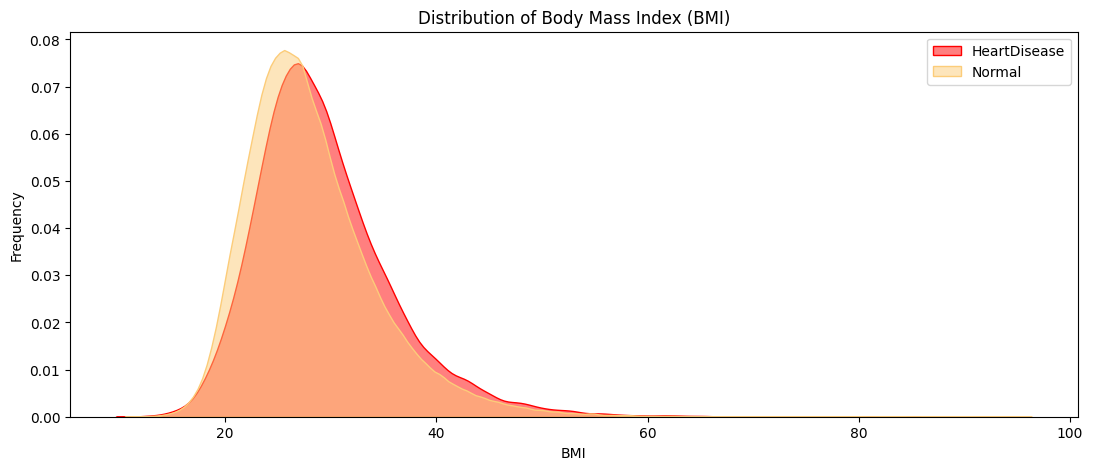

In [ ]:
#Create a subplot to understand relationship between heart disease and BMI
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["BMI"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["BMI"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of Body Mass Index (BMI)')
ax.set_xlabel("BMI")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

<ipython-input-37-9d98ff01ac51>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"]==1]["PhysicalHealth"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
<ipython-input-37-9d98ff01ac51>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"]==0]["PhysicalHealth"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)


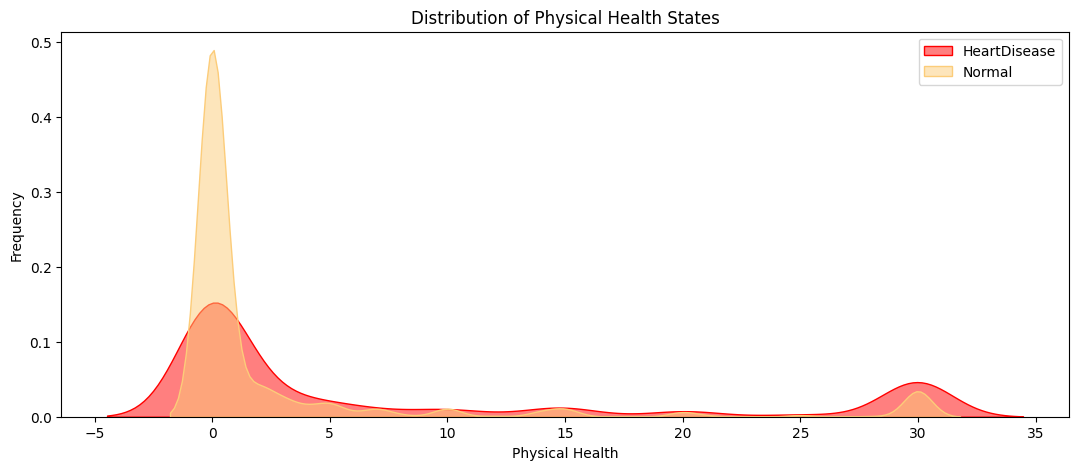

In [ ]:
#Create a subplot to understand relationship between heart disease and physical health
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["PhysicalHealth"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["PhysicalHealth"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of Physical Health States')
ax.set_xlabel("Physical Health")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

<ipython-input-38-3a69fc8e0536>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"]==1]["MentalHealth"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
<ipython-input-38-3a69fc8e0536>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"]==0]["MentalHealth"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)


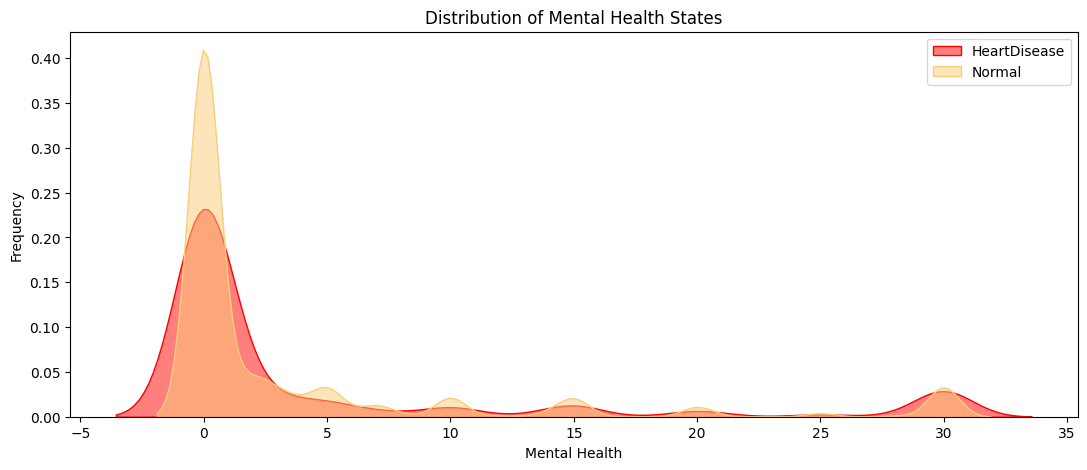

In [ ]:
#Create a subplot to understand relationship between heart disease and mental health
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["MentalHealth"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["MentalHealth"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of Mental Health States')
ax.set_xlabel("Mental Health")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

<ipython-input-39-e939952b2e57>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"]==1]["SleepTime"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
<ipython-input-39-e939952b2e57>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"]==0]["SleepTime"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)


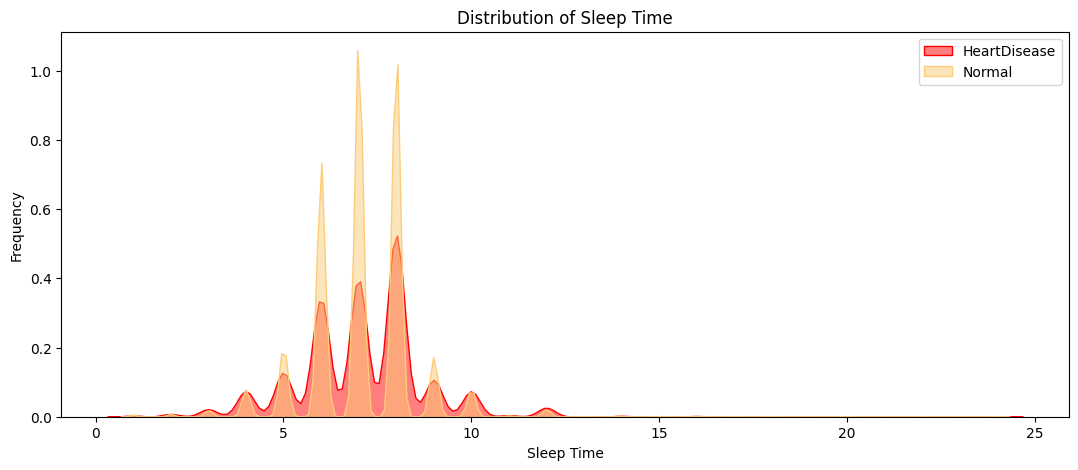

In [ ]:
#Create a subplot to understand relationship between heart disease and sleep time
ig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["SleepTime"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["SleepTime"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of Sleep Time')
ax.set_xlabel("Sleep Time")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

In [ ]:
# Examine the correlation between variables using a heatmap
correlation_matrix = df.corr()

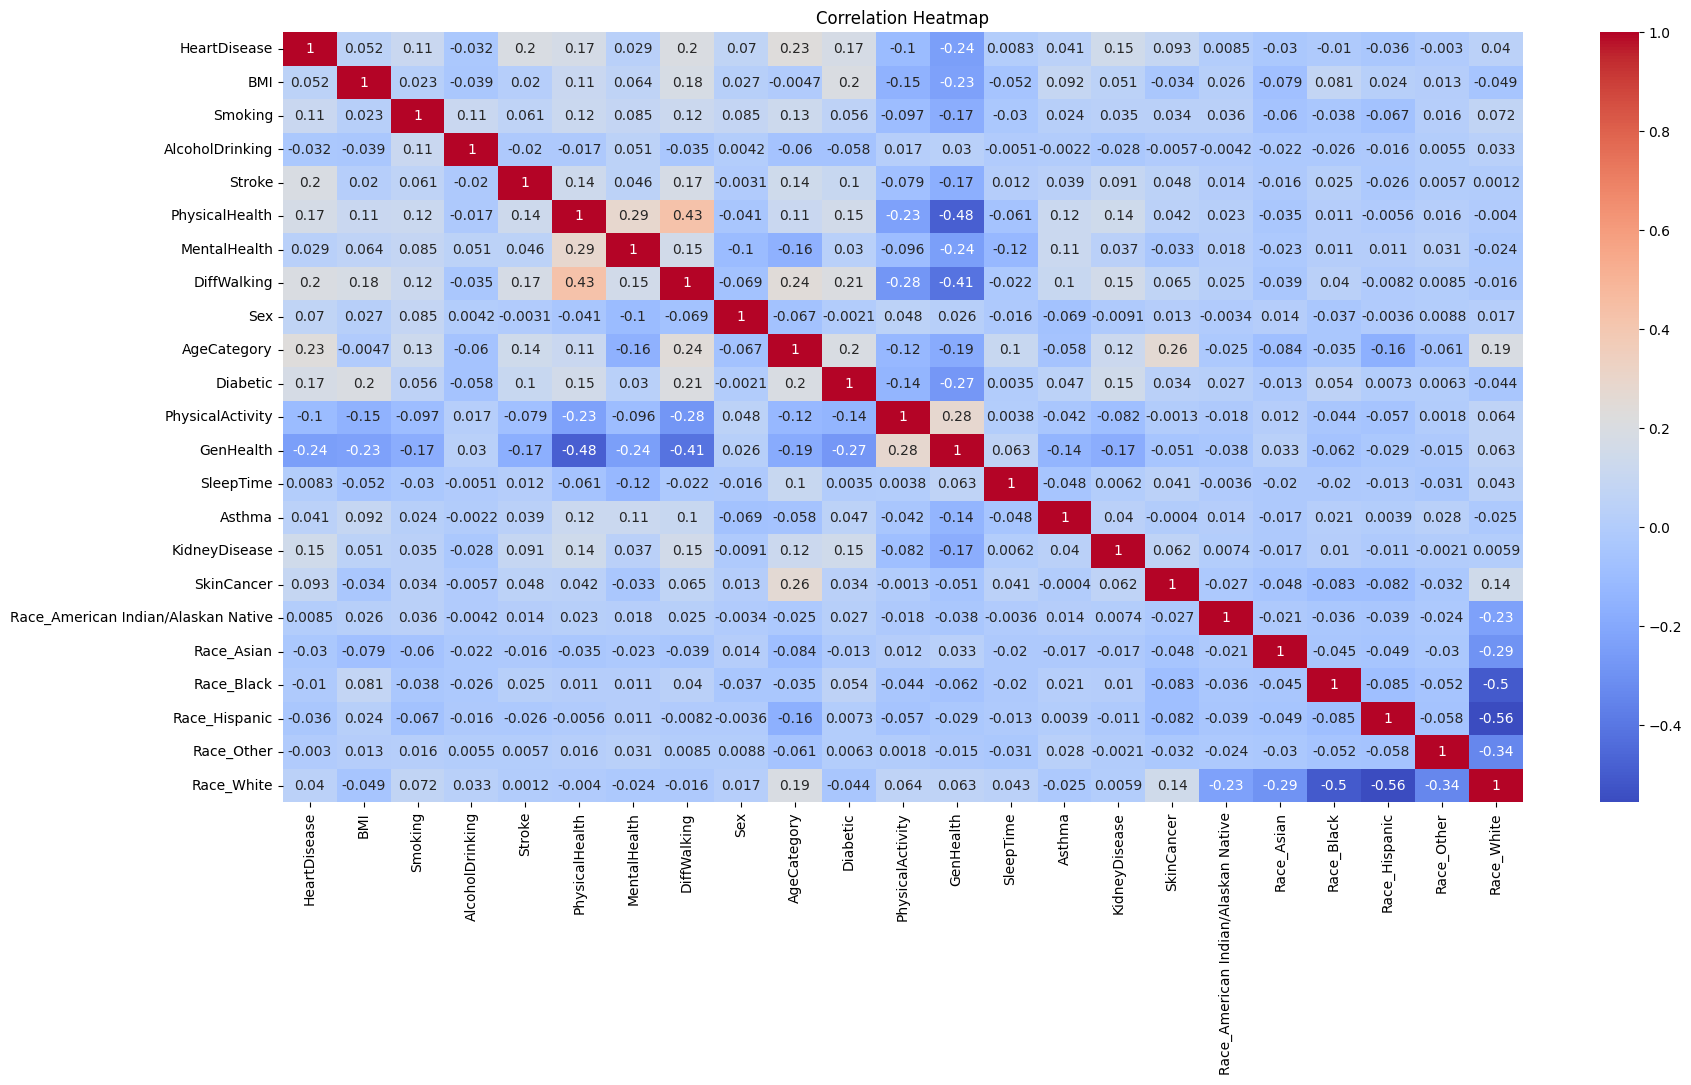

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

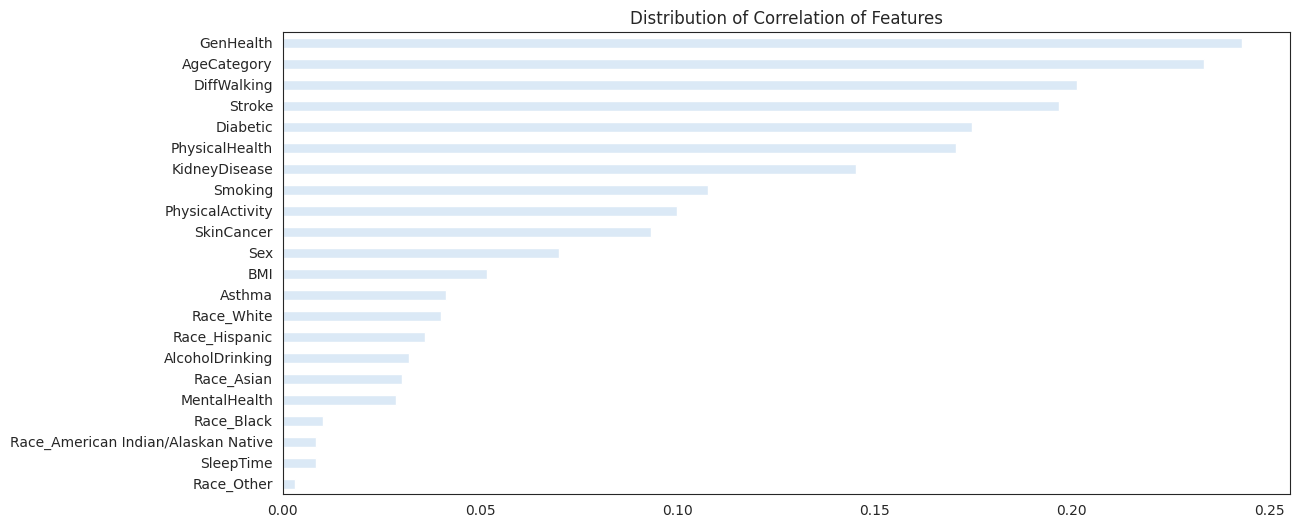

In [ ]:
# Examine distribution of correlation of features
sns.set_style('white')
sns.set_palette('Blues')
plt.figure(figsize = (13,6))
plt.title('Distribution of Correlation of Features')
abs(correlation_matrix['HeartDisease']).sort_values()[:-1].plot.barh()
plt.show()

### **7) Remove outliers**

        HeartDisease       BMI   Smoking  AlcoholDrinking    Stroke  \
0           0.305954  1.844750  1.193474          0.27032  0.198040   
1           0.305954  1.256338  0.837890          0.27032  5.049478   
2           0.305954  0.274603  1.193474          0.27032  0.198040   
3           0.305954  0.647473  0.837890          0.27032  0.198040   
4           0.305954  0.726138  0.837890          0.27032  0.198040   
...              ...       ...       ...              ...       ...   
319790      3.268465  0.144019  1.193474          0.27032  0.198040   
319791      0.305954  0.238291  1.193474          0.27032  0.198040   
319792      0.305954  0.642753  0.837890          0.27032  0.198040   
319793      0.305954  0.705560  0.837890          0.27032  0.198040   
319794      0.305954  2.868839  0.837890          0.27032  0.198040   

        PhysicalHealth  MentalHealth  DiffWalking       Sex  AgeCategory  ...  \
0             0.046751      3.281069     0.401578  0.951711     0.

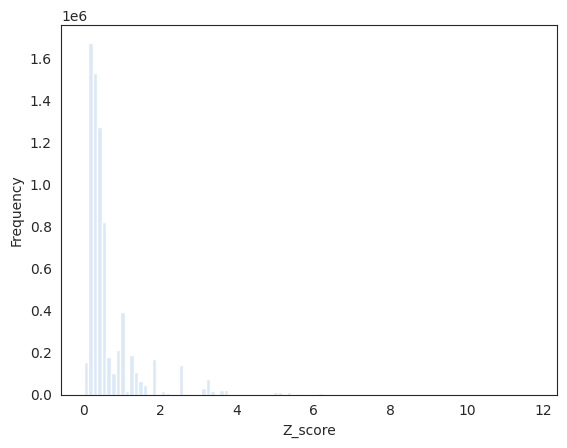

Current number of rows : 319795
Number of rows after removing outliers using 2.5 std dev: 232558
Number of rows after removing outliers using 3 std dev: 272628
Number of rows that are within std dev 2.5 to 3: 40070
Current number of rows : 232558


In [ ]:
#Remove outliers
z_score = np.abs(stats.zscore(df))
print(z_score)

plt.hist(z_score.values.flatten(),bins=100)
plt.xlabel('Z_score')
plt.ylabel('Frequency')
plt.show()

min_threshold = 3.5
max_threshold = 4
print('Current number of rows : {}'.format(df.shape[0]))
print('Number of rows after removing outliers using 2.5 std dev: {}'.format(df[(z_score < min_threshold).all(axis=1)].shape[0]))
print('Number of rows after removing outliers using 3 std dev: {}'.format(df[(z_score < max_threshold).all(axis=1)].shape[0]))
print('Number of rows that are within std dev 2.5 to 3: {}'.format(abs(df[(z_score < min_threshold).all(axis=1)].shape[0]- df[(z_score < max_threshold).all(axis=1)].shape[0])))

df = df[(z_score < min_threshold).all(axis=1)]
print('Current number of rows : {}'.format(df.shape[0]))

In [ ]:
df.head(20)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,16.60,1,0,0,3.0,30.0,0,0,7,...,5.0,1,0,1,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,9,...,8.0,1,0,0,0,0,0,0,0,1
3,0,24.21,0,0,0,0.0,0.0,0,0,11,...,6.0,0,0,1,0,0,0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,...,8.0,0,0,0,0,0,0,0,0,1
6,0,21.63,0,0,0,15.0,0.0,0,0,10,...,4.0,1,0,1,0,0,0,0,0,1
7,0,31.64,1,0,0,5.0,0.0,1,0,12,...,9.0,1,0,0,0,0,0,0,0,1
9,0,40.69,0,0,0,0.0,0.0,1,1,9,...,10.0,0,0,0,0,0,0,0,0,1
11,0,28.71,1,0,0,0.0,0.0,0,0,7,...,5.0,0,0,0,0,0,0,0,0,1
12,0,28.37,1,0,0,0.0,0.0,1,1,11,...,8.0,0,0,0,0,0,0,0,0,1
13,0,28.15,0,0,0,7.0,0.0,1,0,12,...,7.0,0,0,0,0,0,0,0,0,1


### **8) Normalization of data**

In [ ]:
# Create a StandardScaler object
scaler = StandardScaler()

# Select the columns to normalize
columns_to_normalize = ['BMI', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'AgeCategory', 'SleepTime']

# Create a new DataFrame to store the normalized data
df_normalized = df.copy()

# Normalize the selected columns
df_normalized[columns_to_normalize] = scaler.fit_transform(df_normalized[columns_to_normalize])

# Display the normalized DataFrame
df_normalized.head(20)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,-1.975467,1,0,0,0.010829,3.504975,-0.360947,0,0.123977,...,-1.720285,1,0,1,0,0,0,0,0,1
2,0,-0.250046,1,0,0,2.318714,3.504975,-0.360947,1,0.685718,...,0.711314,1,0,0,0,0,0,0,0,1
3,0,-0.659790,0,0,0,-0.396444,-0.471701,-0.360947,0,1.247458,...,-0.909752,0,0,1,0,0,0,0,0,1
4,0,-0.746234,0,0,0,3.404777,-0.471701,2.770486,0,-0.718633,...,0.711314,0,0,0,0,0,0,0,0,1
6,0,-1.105841,0,0,0,1.639924,-0.471701,-0.360947,0,0.966588,...,-2.530818,1,0,1,0,0,0,0,0,1
7,0,0.624767,1,0,0,0.282345,-0.471701,2.770486,0,1.528328,...,1.521847,1,0,0,0,0,0,0,0,1
9,0,2.189403,0,0,0,-0.396444,-0.471701,2.770486,1,0.685718,...,2.332379,0,0,0,0,0,0,0,0,1
11,0,0.118206,1,0,0,-0.396444,-0.471701,-0.360947,0,0.123977,...,-1.720285,0,0,0,0,0,0,0,0,1
12,0,0.059424,1,0,0,-0.396444,-0.471701,2.770486,1,1.247458,...,0.711314,0,0,0,0,0,0,0,0,1
13,0,0.021388,0,0,0,0.553861,-0.471701,2.770486,0,1.528328,...,-0.099219,0,0,0,0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232558 entries, 0 to 319794
Data columns (total 23 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   HeartDisease                         232558 non-null  int64  
 1   BMI                                  232558 non-null  float64
 2   Smoking                              232558 non-null  int64  
 3   AlcoholDrinking                      232558 non-null  int64  
 4   Stroke                               232558 non-null  int64  
 5   PhysicalHealth                       232558 non-null  float64
 6   MentalHealth                         232558 non-null  float64
 7   DiffWalking                          232558 non-null  int64  
 8   Sex                                  232558 non-null  int64  
 9   AgeCategory                          232558 non-null  int64  
 10  Diabetic                             232558 non-null  int64  
 11  PhysicalActiv

### **9) Splitting dataset into training and testing sets**

In [ ]:
# Divide into X and y training and testing sets
X = df_normalized.drop(['HeartDisease'], axis=1)
y = df_normalized['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model Selection and Performance**

### **10) Model Training**

Decison Tree

In [ ]:
# Initialize the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_y_pred = dt_model.predict(X_test)

# Calculate accuracy
dt_accuracy = accuracy_score(y_test, dt_y_pred)

# Print the accuracy
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.8781604747162023


Support Vector Machines (SVM)

In [ ]:
# Initialize the SVM classifier
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
svm_y_pred = svm_model.predict(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_y_pred)

# Print the accuracy
print("Support Vector Machines Accuracy:", svm_accuracy)

Support Vector Machines Accuracy: 0.9271800825593395


Naive Bayes

In [ ]:
# Initialize the Naive Bayes classifier
nb_model = GaussianNB()

# Train the Naive Bayes model
nb_model.fit(X_train, y_train)

# Make predictions on the test set
nb_y_pred = nb_model.predict(X_test)

# Calculate accuracy
nb_accuracy = accuracy_score(y_test, nb_y_pred)

# Print the accuracy
print("Naive Bayes Accuracy:", nb_accuracy)

Naive Bayes Accuracy: 0.8426427588579292


KNN Classifier

In [ ]:
# Initialize the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
knn_y_pred = knn_model.predict(X_test)

# Calculate accuracy
knn_accuracy = accuracy_score(y_test, knn_y_pred)

# Print the accuracy
print("KNN Accuracy:", knn_accuracy)

KNN Accuracy: 0.9206011351909185


Random Forest Classifier

In [ ]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_y_pred)

# Print the accuracy
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.9149251805985552


Neural Network

In [ ]:
# Build the neural network model
nn_model = Sequential()
nn_model.add(Dense(16, activation='relu', input_shape=(22,)))
nn_model.add(Dense(8, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

# Compile the neural network model
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the neural network model
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the neural network model on the testing data
nn_loss, nn_accuracy = nn_model.evaluate(X_test, y_test)
print('Neural Network Test Loss:', nn_loss)
print('Neural Network Test Accuracy:', nn_accuracy)

Epoch 1/10
5814/5814 [==============================] - 12s 2ms/step - loss: 0.2207 - accuracy: 0.9228
Epoch 2/10
5814/5814 [==============================] - 10s 2ms/step - loss: 0.2100 - accuracy: 0.9273
Epoch 3/10
5814/5814 [==============================] - 11s 2ms/step - loss: 0.2094 - accuracy: 0.9273
Epoch 4/10
5814/5814 [==============================] - 11s 2ms/step - loss: 0.2092 - accuracy: 0.9272
Epoch 5/10
5814/5814 [==============================] - 12s 2ms/step - loss: 0.2090 - accuracy: 0.9274
Epoch 6/10
5814/5814 [==============================] - 11s 2ms/step - loss: 0.2089 - accuracy: 0.9274
Epoch 7/10
5814/5814 [==============================] - 11s 2ms/step - loss: 0.2088 - accuracy: 0.9274
Epoch 8/10
5814/5814 [==============================] - 11s 2ms/step - loss: 0.2087 - accuracy: 0.9275
Epoch 9/10
5814/5814 [==============================] - 12s 2ms/step - loss: 0.2087 - accuracy: 0.9275
Epoch 10/10
1454/1454 [==============================] - 2s 1ms/step - lo

In [ ]:
ns =[26,1,0,0,20,30,0,1,9,1,1,1,8,1,0,0,0,0,0,0,0,1]
ns_reshaped=np.reshape(ns,(1,-1))

predicted_percentage = nn_model.predict(ns_reshaped)

print('Percentage of getting heart diseases = ',predicted_percentage)

Percentage of getting heart diseases =  [[0.84056425]]


/usr/local/lib/python3.10/dist-packages/tensorflow/python/keras/engine/sequential.py:429: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


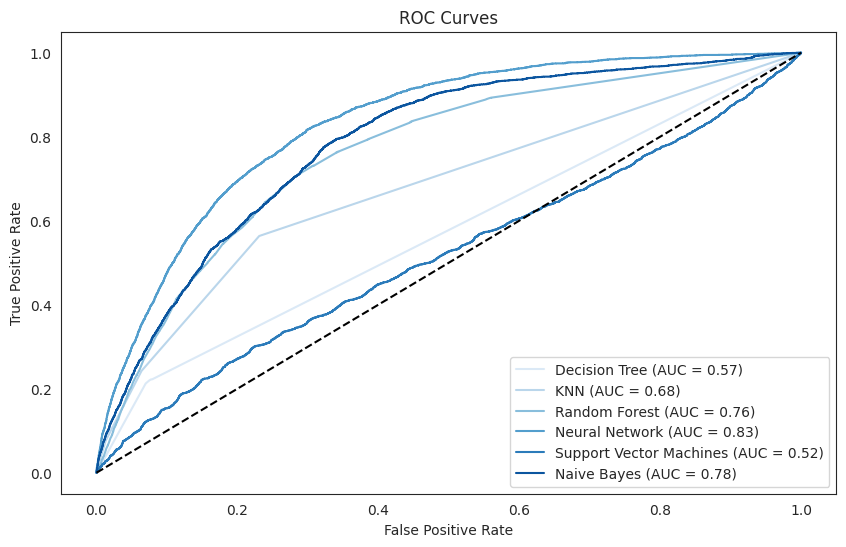

In [ ]:
# Calculate the predicted probabilities for each model
dt_y_pred_proba = dt_model.predict_proba(X_test)[:, 1]
knn_y_pred_proba = knn_model.predict_proba(X_test)[:, 1]
rf_y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
nn_y_pred_proba = nn_model.predict_proba(X_test)[:, 0]
svm_y_pred_proba = svm_model.decision_function(X_test)
nb_y_pred_proba = nb_model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (FPR) and true positive rate (TPR) for ROC curves
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_y_pred_proba)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_y_pred_proba)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_pred_proba)
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_y_pred_proba)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_y_pred_proba)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_y_pred_proba)

# Calculate the area under the ROC curve (AUC) for each model
dt_auc = roc_auc_score(y_test, dt_y_pred_proba)
knn_auc = roc_auc_score(y_test, knn_y_pred_proba)
rf_auc = roc_auc_score(y_test, rf_y_pred_proba)
nn_auc = roc_auc_score(y_test, nn_y_pred_proba)
svm_auc = roc_auc_score(y_test, svm_y_pred_proba)
nb_auc = roc_auc_score(y_test, nb_y_pred_proba)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUC = {:.2f})'.format(dt_auc))
plt.plot(knn_fpr, knn_tpr, label='KNN (AUC = {:.2f})'.format(knn_auc))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc))
plt.plot(nn_fpr, nn_tpr, label='Neural Network (AUC = {:.2f})'.format(nn_auc))
plt.plot(svm_fpr, svm_tpr, label='Support Vector Machines (AUC = {:.2f})'.format(svm_auc))
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (AUC = {:.2f})'.format(nb_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()